In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_parquet('/Users/roman/Downloads/rail_data_cleaned_20230728132300.parquet')

Merge the Station Rail Name Reference Table with the API data in order to provide more readable station names.
How would you determine the top 10 most frequently visited stations in a day?
What information can be explored to understand train delays?
Are certain stations busier than others at certain times?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 8 to 94243
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                37100 non-null  object        
 1   unique_id               37100 non-null  object        
 2   service_start_date      37100 non-null  object        
 3   update_origin           36515 non-null  object        
 4   train_platform          37100 non-null  object        
 5   working_time_pass       0 non-null      datetime64[ns]
 6   working_time_arrival    37100 non-null  datetime64[ns]
 7   working_time_departure  37100 non-null  datetime64[ns]
 8   planned_time_arrival    33855 non-null  datetime64[ns]
 9   planned_time_departure  33580 non-null  datetime64[ns]
 10  pass                    0 non-null      object        
 11  platform                34114 non-null  object        
 12  train_length            10595 non-null  object

In [6]:
data.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,None,5,None,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,None,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,None,B,None,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,None,A,None,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,None,1,8,NaT,NaT,False,False


In [7]:
reference_data=pd.read_csv('/Users/roman/Downloads/RailReferences.csv')

In [8]:
reference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AtcoCode              2628 non-null   object 
 1   TiplocCode            2628 non-null   object 
 2   CrsCode               2628 non-null   object 
 3   StationName           2628 non-null   object 
 4   StationNameLang       0 non-null      float64
 5   GridType              2627 non-null   object 
 6   Easting               2628 non-null   int64  
 7   Northing              2628 non-null   int64  
 8   CreationDateTime      2628 non-null   object 
 9   ModificationDateTime  2628 non-null   object 
 10  RevisionNumber        2628 non-null   int64  
 11  Modification          2628 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 246.5+ KB


In [9]:
reference_data.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [10]:
print(reference_data.shape) 

print(data.shape)

(2628, 12)
(37100, 17)


In [11]:
#Look at empty values in sample dataset.
print(data.isnull().sum())

route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64


In [12]:
print(data.columns)

Index(['route_id', 'unique_id', 'service_start_date', 'update_origin',
       'train_platform', 'working_time_pass', 'working_time_arrival',
       'working_time_departure', 'planned_time_arrival',
       'planned_time_departure', 'pass', 'platform', 'train_length',
       'actual_arrival_time', 'actual_departure_time', 'is_delayed_arrival',
       'is_delayed_departure'],
      dtype='object')


In [13]:
station_names = data['train_platform'].value_counts()
top_10_popular_stations = station_names.head(10)
print(top_10_popular_stations)

LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: train_platform, dtype: int64


In [14]:
#Look at empty values in sample dataset.
print(reference_data.isnull().sum())

AtcoCode                   0
TiplocCode                 0
CrsCode                    0
StationName                0
StationNameLang         2628
GridType                   1
Easting                    0
Northing                   0
CreationDateTime           0
ModificationDateTime       0
RevisionNumber             0
Modification               0
dtype: int64


In [15]:
#Ranmed the column for the reference dataset to match the sample dataset in order to merge the station codes. That way we can pair it with Station name.
reference_data = reference_data.rename(columns={'TiplocCode':'train_platform'})

In [16]:
reference_data.head()

,AtcoCode,train_platform,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [17]:
#Here we managed to merge the datasets based on the similar column using left join.
merged = pd.merge(data, reference_data, on='train_platform', how='left')

In [18]:
merged.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,...,SRA,Stratford (London) Rail Station,NaN,U,538557.0,184444.0,2003-11-04T00:00:00,2009-10-05T17:34:50,2.0,rev
1,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,...,SEV,Sevenoaks Rail Station,NaN,U,552267.0,155340.0,2003-11-04T00:00:00,2006-09-18T18:24:34,1.0,rev


In [19]:
print(merged.columns)

Index(['route_id', 'unique_id', 'service_start_date', 'update_origin',
       'train_platform', 'working_time_pass', 'working_time_arrival',
       'working_time_departure', 'planned_time_arrival',
       'planned_time_departure', 'pass', 'platform', 'train_length',
       'actual_arrival_time', 'actual_departure_time', 'is_delayed_arrival',
       'is_delayed_departure', 'AtcoCode', 'CrsCode', 'StationName',
       'StationNameLang', 'GridType', 'Easting', 'Northing',
       'CreationDateTime', 'ModificationDateTime', 'RevisionNumber',
       'Modification'],
      dtype='object')


In [21]:
station_names = merged['train_platform'].value_counts()
top_10_popular_stations = station_names.head(10)
print(top_10_popular_stations)

LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
Name: train_platform, dtype: int64


In [21]:
# Value counts for Station Names because train_platform only gives the short names.
station_names2 = merged['StationName'].value_counts()
top_10_popular_stations2 = station_names2.head(10)
print(top_10_popular_stations2)

London Bridge Rail Station           317
Clapham Junction Rail Station        261
London Waterloo East Rail Station    166
Cricklewood Rail Station             147
Stockport Rail Station               147
East Croydon Rail Station            147
Vauxhall Rail Station                132
Reading Rail Station                 123
Gatwick Airport Rail Station         118
London Blackfriars Rail Station      117
Name: StationName, dtype: int64


In [22]:
value = 'Clapham Junction Rail Station'

mask = merged['StationName'] == value
print(merged[mask])

              route_id unique_id service_start_date update_origin  \
300    202307277622356    L22356         2023-07-27        Darwin   
459    202307277625372    L25372         2023-07-27           CIS   
542    202307277622765    L22765         2023-07-27            TD   
592    202307277625192    L25192         2023-07-27           CIS   
719    202307277682904    L82904         2023-07-27           CIS   
...                ...       ...                ...           ...   
36442  202307278950311    Y50311         2023-07-27            TD   
36541  202307277622860    L22860         2023-07-27            TD   
36562  202307277623170    L23170         2023-07-27        Darwin   
36658  202307287621299    L21299         2023-07-28        Darwin   
36779  202307277682975    L82975         2023-07-27        Darwin   

      train_platform working_time_pass working_time_arrival  \
300          CLPHMJM               NaT  2023-07-27 19:11:00   
459          CLPHMJW               NaT  2023-

It is found that Clapham Junction Rail Station has multiple shortened names but it is the second most popular station.

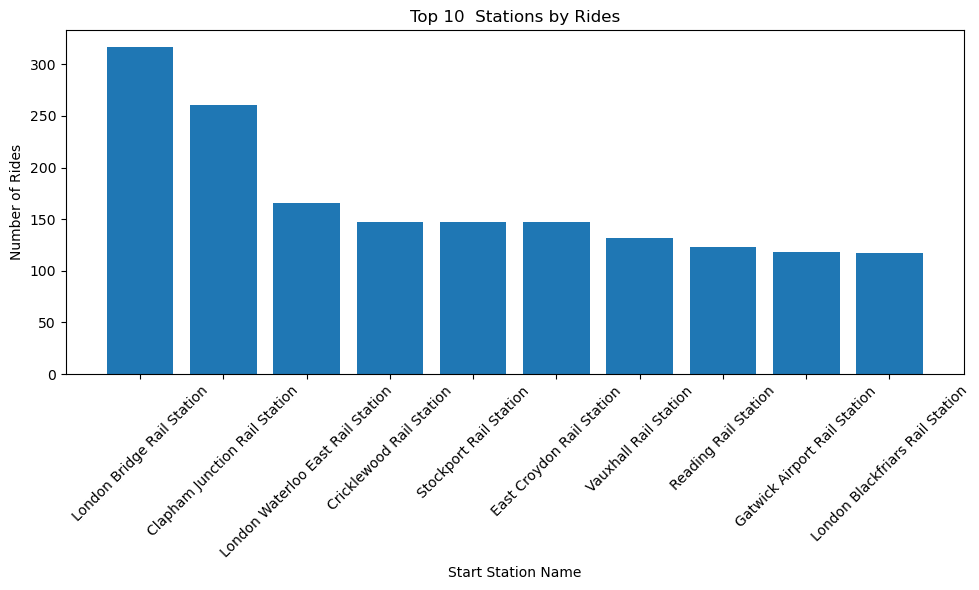

In [25]:
#Here are the top 10 most frequently visited stations overall.
plt.figure(figsize=(10, 6))  
plt.bar(top_10_popular_stations2.index, top_10_popular_stations2.values)
plt.xlabel('Start Station Name')
plt.ylabel('Number of Rides')
plt.title('Top 10  Stations by Rides')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [26]:
merged["actual_arrival_time"] = pd.to_datetime(merged["actual_arrival_time"])
merged["actual_departure_time"] = pd.to_datetime(merged["actual_departure_time"])
merged["working_time_arrival"] = pd.to_datetime(merged["working_time_arrival"])
merged["working_time_departure"] = pd.to_datetime(merged["working_time_departure"])

In [27]:
column_values_head = merged['actual_arrival_time'].head()

print(column_values_head)

0   2023-07-27 00:53:00
1   2023-07-27 00:57:00
2   2023-07-27 01:07:00
3   2023-07-27 01:09:00
4                   NaT
Name: actual_arrival_time, dtype: datetime64[ns]


In [28]:
arrival = merged["actual_arrival_time"].value_counts()
print(arrival)

2023-07-27 17:50:00    99
2023-07-27 23:47:00    97
2023-07-27 18:08:00    92
2023-07-27 20:19:00    85
2023-07-27 17:39:00    84
                       ..
2023-07-28 02:34:00     1
2023-07-28 19:14:00     1
2023-07-27 02:34:00     1
2023-07-27 02:30:00     1
2023-07-28 02:21:00     1
Name: actual_arrival_time, Length: 2035, dtype: int64


In [29]:
#I extracted only the date of each arrival and departure and found that there are only three dates in this dataset.
merged['arrival_day'] = merged['actual_arrival_time'].dt.date
merged['departure_day']= merged['actual_departure_time'].dt.date

In [30]:
arrival2 = merged["arrival_day"].value_counts()
print(arrival2)

2023-07-28    16190
2023-07-27    15489
2023-07-29       90
Name: arrival_day, dtype: int64


In [31]:
departure = merged["departure_day"].value_counts()
print(departure)

2023-07-27    18064
2023-07-28    16236
2023-07-29       84
Name: departure_day, dtype: int64


In [32]:
df = merged.groupby(['arrival_day', 'StationName'])['StationName'].count().reset_index(name='Count')

# Sort values 
df = df.sort_values('Count', ascending=False).groupby('arrival_day').head(10).reset_index(drop=True)

print(df)

   arrival_day                                      StationName  Count
0   2023-07-28                       London Bridge Rail Station    158
1   2023-07-27                    Clapham Junction Rail Station    119
2   2023-07-27                       London Bridge Rail Station    113
3   2023-07-28                           Stockport Rail Station     97
4   2023-07-28                    Clapham Junction Rail Station     86
5   2023-07-28                         Cricklewood Rail Station     86
6   2023-07-28                London Waterloo East Rail Station     79
7   2023-07-28                            Vauxhall Rail Station     73
8   2023-07-28               Milton Keynes Central Rail Station     72
9   2023-07-27                             Reading Rail Station     72
10  2023-07-27                        East Croydon Rail Station     71
11  2023-07-28                            Stafford Rail Station     65
12  2023-07-28                            Lewisham Rail Station     63
13  20

Text(0.5, 1.0, 'Count by Station and Date')

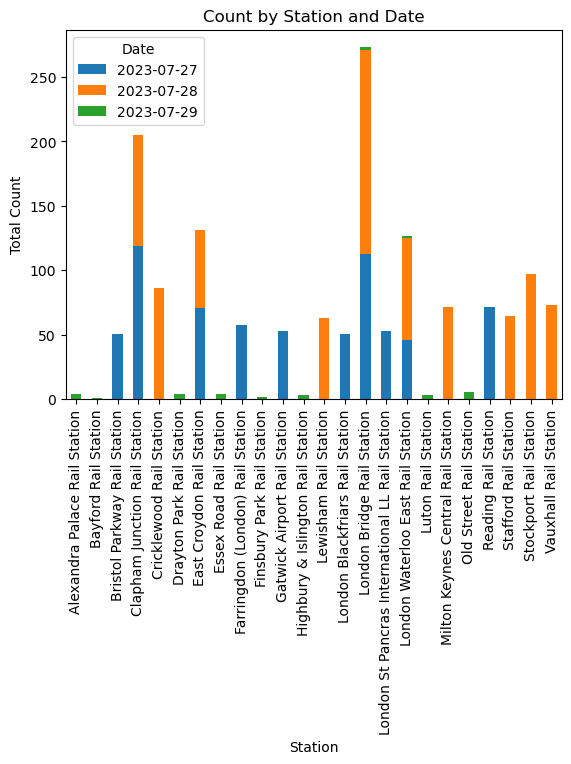

In [33]:
df.groupby(['StationName','arrival_day'])['Count'].sum().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Station')
plt.ylabel('Total Count')
plt.legend(loc='upper left', title='Date')
plt.title('Count by Station and Date')

In [34]:
df2 = merged.groupby(['departure_day', 'StationName'])['StationName'].count().reset_index(name='Count')

# Sort values 
df2 = df2.sort_values('Count', ascending=False).groupby('departure_day').head(10).reset_index(drop=True)

print(df2)

   departure_day                                      StationName  Count
0     2023-07-28                       London Bridge Rail Station    158
1     2023-07-27                    Clapham Junction Rail Station    151
2     2023-07-27                       London Bridge Rail Station    127
3     2023-07-28                           Stockport Rail Station     97
4     2023-07-28                    Clapham Junction Rail Station     94
5     2023-07-28                         Cricklewood Rail Station     87
6     2023-07-27                             Reading Rail Station     82
7     2023-07-28                London Waterloo East Rail Station     80
8     2023-07-27                        East Croydon Rail Station     79
9     2023-07-28                            Vauxhall Rail Station     73
10    2023-07-28               Milton Keynes Central Rail Station     72
11    2023-07-27                 Farringdon (London) Rail Station     67
12    2023-07-28                            Staffor

Text(0.5, 1.0, 'Count by Station and Date')

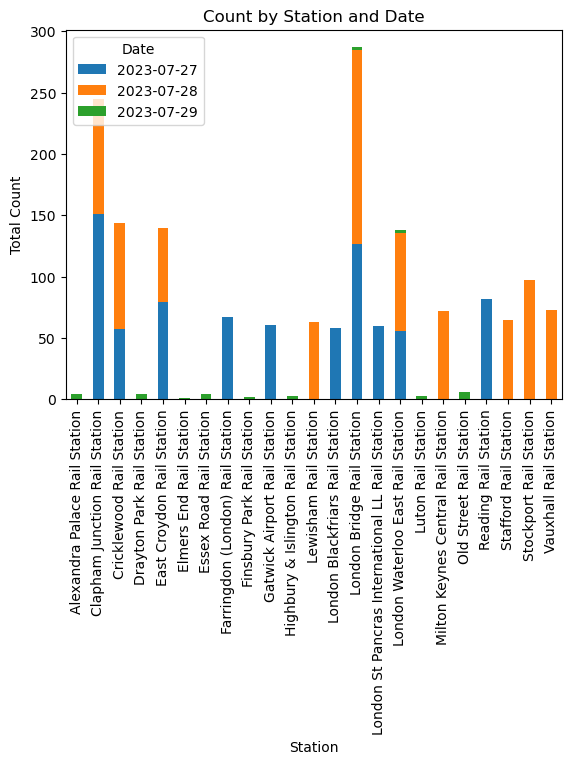

In [35]:
df2.groupby(['StationName','departure_day'])['Count'].sum().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Station')
plt.ylabel('Total Count')
plt.legend(loc='upper left', title='Date')
plt.title('Count by Station and Date')

In [37]:
length_of_train = merged["train_length"].value_counts()
length_of_train.head(10)

8     3076
5     1875
4     1574
10    1103
12    1054
3      866
6      566
2      425
7       45
11       6
Name: train_length, dtype: int64

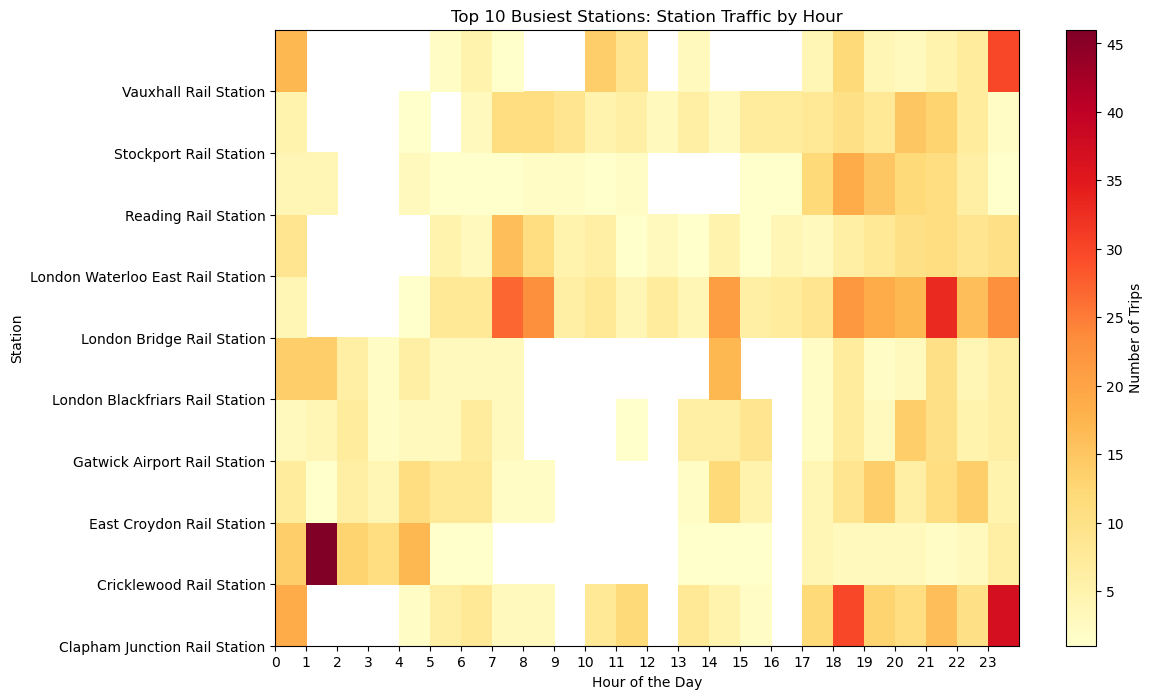

In [38]:
# Extract the hour from the actual_time_arrival column
merged['hour'] = merged['actual_arrival_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips = merged['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df = merged[merged['StationName'].isin(top_10_busy_stations)]

# Group by StationName and hour, then count occurrences
station_hourly_counts = top_10_df.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = station_hourly_counts.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Arrival Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

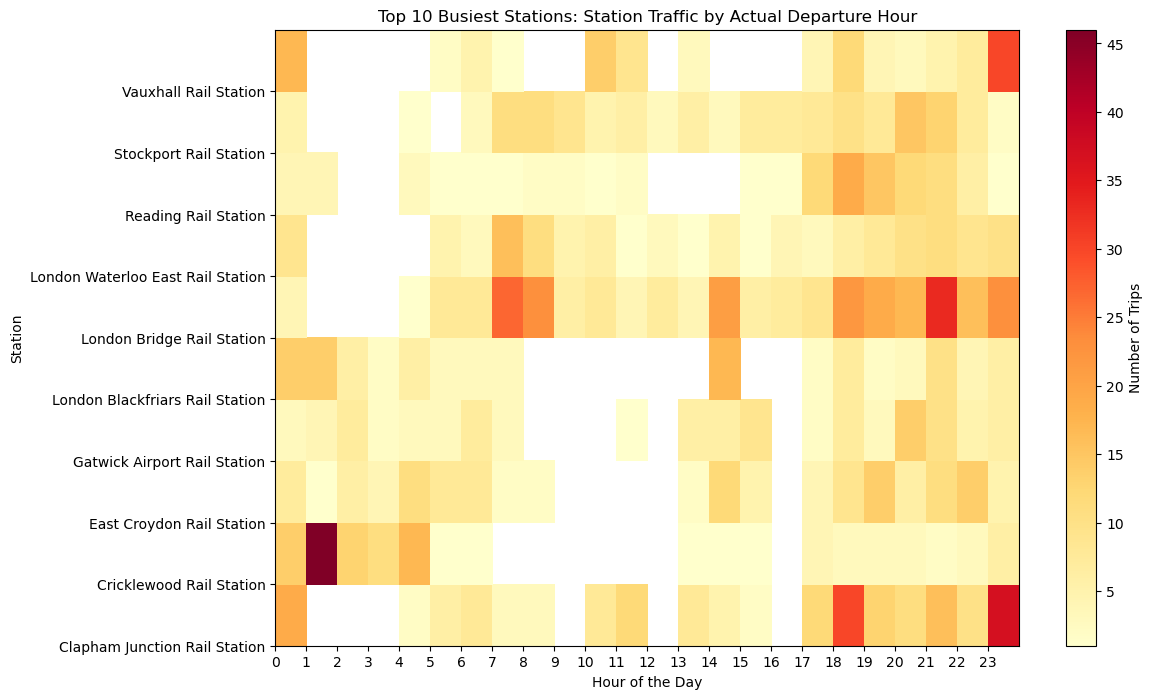

In [46]:
# Extract the hour from the departure_time_arrival column
merged['departure_hour'] = merged['actual_departure_time'].dt.hour

# Calculate the total number of trips for each station
station_total_trips2 = merged['StationName'].value_counts()

# Get the top 10 busiest stations
top_10_busy_stations2 = station_total_trips.head(10).index

# Filter the data for the top 10 stations
top_10_df2 = merged[merged['StationName'].isin(top_10_busy_stations2)]

# Group by StationName and hour, then count occurrences
station_hourly_counts2= top_10_df2.groupby(['StationName', 'hour']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data2 = station_hourly_counts2.pivot(index='StationName', columns='hour', values='count')

# Plot a heatmap to visualize the busiest hours for each top 10 station
plt.figure(figsize=(12, 8))
plt.pcolor(pivot_data, cmap='YlOrRd')
plt.colorbar(label='Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Station')
plt.title('Top 10 Busiest Stations: Station Traffic by Actual Departure Hour')
plt.xticks(range(24), range(24))
plt.yticks(range(len(pivot_data)), pivot_data.index)
plt.show()

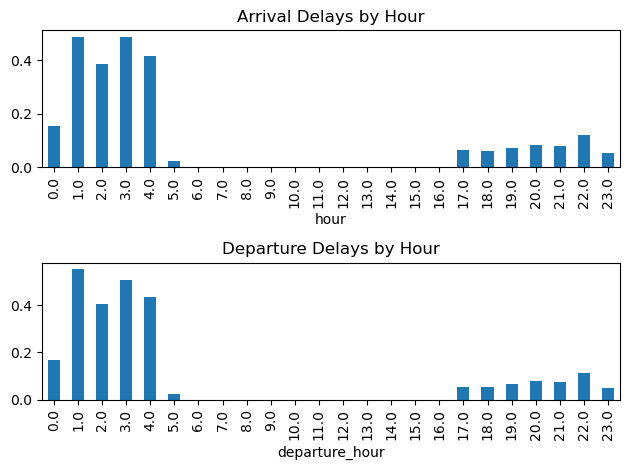

In [48]:
#Comparing arrival and departure delays with time of day can provide ways to look into certain areas on how to improve punctuality.
arrival_delays = merged.groupby('hour')['is_delayed_arrival'].mean()
departure_delays = merged.groupby('departure_hour')['is_delayed_departure'].mean()
fig, (ax1, ax2) = plt.subplots(2, 1)
arrival_delays.plot(kind='bar', title='Arrival Delays by Hour', ax=ax1)
departure_delays.plot(kind='bar', title='Departure Delays by Hour', ax=ax2)
plt.tight_layout()
plt.show()



It is found that there are more delays in the evening/night time. This could be due more passengers boarding after work/school.The busiest stations per hour graph supports that possibility. It can also be due to system or equipment problems being more common after being used throughout the day.

In [54]:
#Let's look at the stations with most delays and look into the details on each station.
delayed_stations_df = merged[merged['is_delayed_arrival'] == True] 
                            

station_delays = delayed_stations_df.groupby('StationName').size().reset_index(name='delay_count')

station_delays = station_delays.sort_values('delay_count', ascending=False).head(10)

print(station_delays)

                         StationName  delay_count
100         Cricklewood Rail Station           88
322            Stafford Rail Station           26
164           Haymarket Rail Station           23
210  London Blackfriars Rail Station           22
55      Bristol Parkway Rail Station           19
292           Sandhills Rail Station           18
276             Reading Rail Station           18
246             Norwich Rail Station           17
273        Preston Park Rail Station           16
127    Exeter St Davids Rail Station           16


In [77]:
#Compare the top 10 station with delays with the length of train.
train_df = merged[['StationName', 'train_length']] 

# Inner join on StationName  
train_length_df = station_delays.merge(train_df, on='StationName', how='inner')
train_length_df.head(10)

,StationName,delay_count,train_length
0,Cricklewood Rail Station,88,8
1,Cricklewood Rail Station,88,None
2,Cricklewood Rail Station,88,None
3,Cricklewood Rail Station,88,12
4,Cricklewood Rail Station,88,8
5,Cricklewood Rail Station,88,None
6,Cricklewood Rail Station,88,None
7,Cricklewood Rail Station,88,8
8,Cricklewood Rail Station,88,None
9,Cricklewood Rail Station,88,8


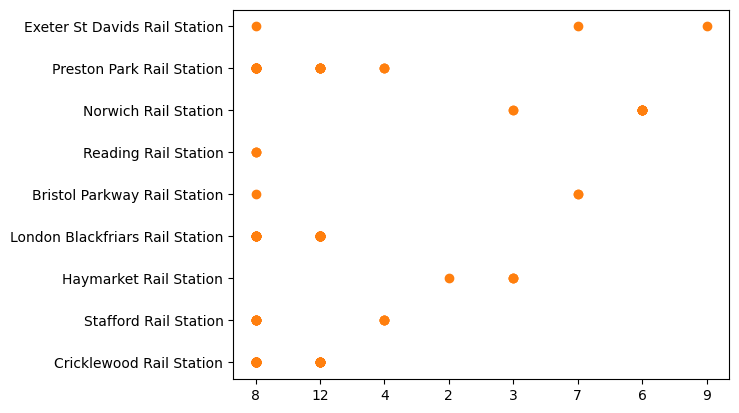

In [91]:
train_length_df = train_length_df.dropna()
plt.scatter(train_length_df['delay_count'], train_length_df['train_length'])
cleaned_train_length = train_length_df.fillna(0)
plt.scatter(cleaned_train_length['train_length'], cleaned_train_length['StationName'])




Further analysis will be needed but it seems like the train_length of 8 seems to be more common with delays. These trains can have infrastructure issue.

In [ ]:
#Group delays by route_id to see which routes are most affected..
#compare route id with train length. See if train_length need to be adjusted.
#The location of stations can help determine which location is most popular and where else can new stations be built to improve delays and access.

